In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(style="whitegrid")

# Load cleaned dataset
df = pd.read_csv('../data/processed/clean_sleep.csv')

# Quick check
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic_BP,Diastolic_BP
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,NaN,126,83
1,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,NaN,125,80
3,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90
4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,140,90


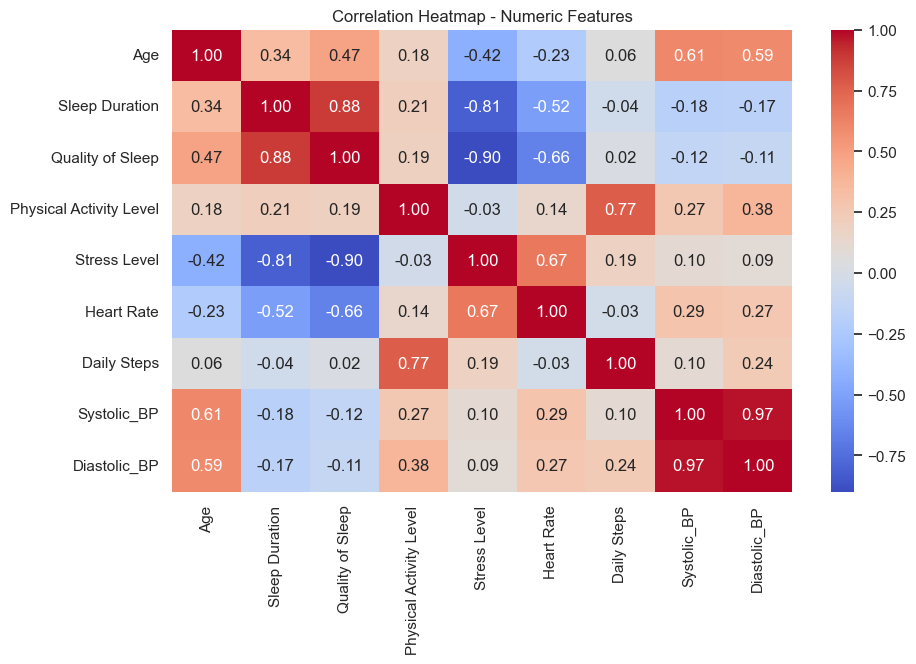

In [3]:
# Correlation heatmap for numerical features
plt.figure(figsize=(10, 6))

# Only numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64'])

# Plot
sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap - Numeric Features")
plt.show()


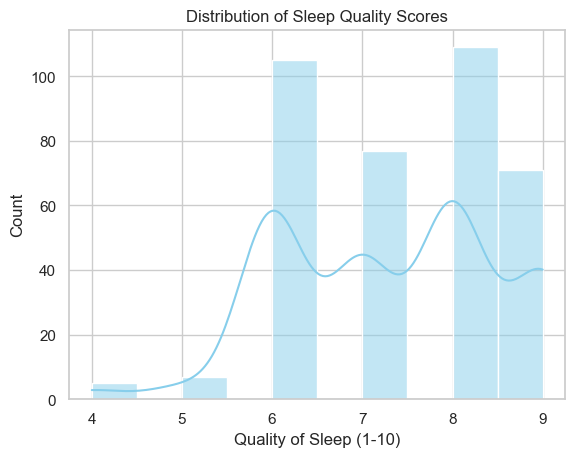

In [4]:
# Distribution of the target variable
sns.histplot(df['Quality of Sleep'], bins=10, kde=True, color='skyblue')
plt.title("Distribution of Sleep Quality Scores")
plt.xlabel("Quality of Sleep (1-10)")
plt.ylabel("Count")
plt.show()


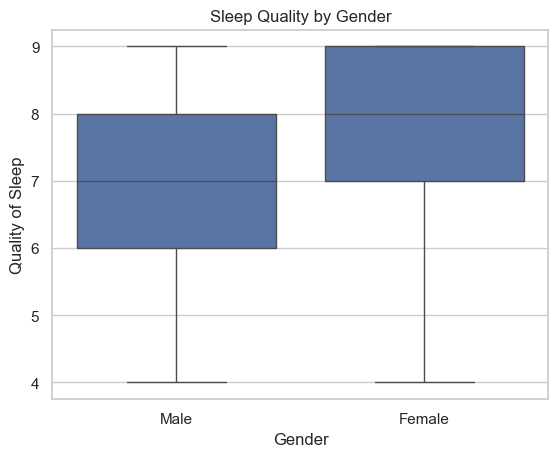

In [5]:
#sleep quality by gender
sns.boxplot(x='Gender', y='Quality of Sleep', data=df)
plt.title("Sleep Quality by Gender")
plt.show()


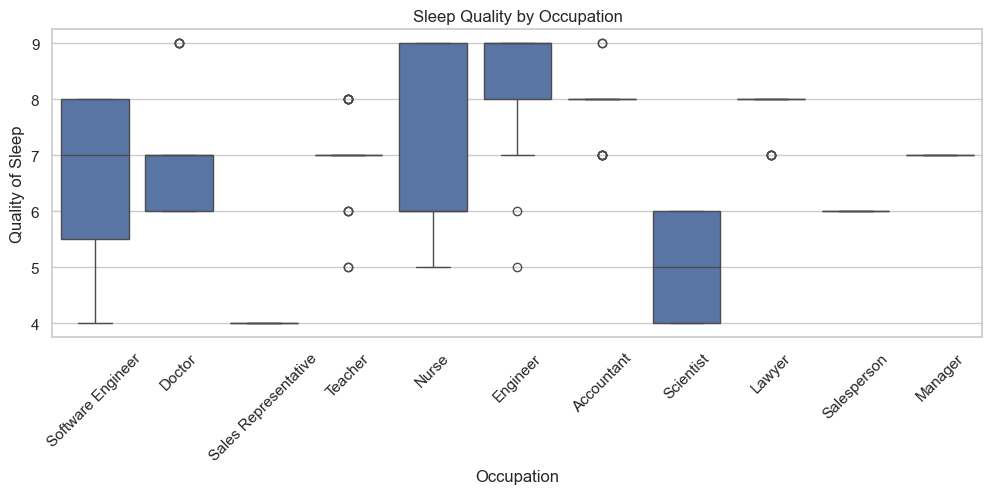

In [6]:
#sleep quality by occupation
plt.figure(figsize=(12,4))
sns.boxplot(x='Occupation', y='Quality of Sleep', data=df)
plt.xticks(rotation=45)
plt.title("Sleep Quality by Occupation")
plt.show()

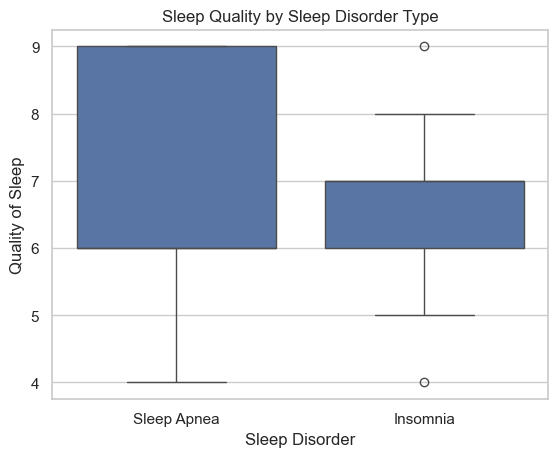

In [7]:
#sleep quality by sleep disorder
sns.boxplot(x='Sleep Disorder', y='Quality of Sleep', data=df)
plt.title("Sleep Quality by Sleep Disorder Type")
plt.show()

In [8]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    print(f"{column}: Removing outliers outside [{lower:.2f}, {upper:.2f}]")

    # Filter the DataFrame
    return df[(df[column] >= lower) & (df[column] <= upper)]


In [9]:
# List of features to clean
columns_to_check = ['Sleep Duration', 'Heart Rate', 'Daily Steps',
                    'Stress Level', 'Physical Activity Level']

# Apply function one by one
for col in columns_to_check:
    df = remove_outliers_iqr(df, col)


Sleep Duration: Removing outliers outside [4.30, 9.90]
Heart Rate: Removing outliers outside [62.00, 78.00]
Daily Steps: Removing outliers outside [3000.00, 11000.00]
Stress Level: Removing outliers outside [-0.50, 11.50]
Physical Activity Level: Removing outliers outside [0.00, 120.00]


In [10]:
# Save cleaned data
df.to_csv('../data/processed/clean_sleep_no_outliers.csv', index=False)
print("Saved cleaned dataset for modeling.")


Saved cleaned dataset for modeling.


In [12]:
# Update with actual filename if different
smartwatch_df = pd.read_csv('/Users/rutujashingate/Desktop/sleep-ml-project/data/raw/smartwatch_sleep_dataset.csv')  

# Initial inspection
smartwatch_df.shape
smartwatch_df.head()
smartwatch_df.info()
smartwatch_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   user_id                         20000 non-null  object 
 1   date_recorded                   20000 non-null  object 
 2   sleep_start_timestamp           20000 non-null  object 
 3   sleep_end_timestamp             20000 non-null  object 
 4   duration_minutes                20000 non-null  int64  
 5   sleep_latency_minutes           20000 non-null  int64  
 6   wake_after_sleep_onset_minutes  20000 non-null  int64  
 7   sleep_efficiency_pct            20000 non-null  float64
 8   sleep_score                     20000 non-null  int64  
 9   daily_label                     20000 non-null  object 
 10  sleep_stage_deep_pct            20000 non-null  float64
 11  sleep_stage_light_pct           20000 non-null  float64
 12  sleep_stage_rem_pct             

,duration_minutes,sleep_latency_minutes,wake_after_sleep_onset_minutes,sleep_efficiency_pct,sleep_score,sleep_stage_deep_pct,sleep_stage_light_pct,sleep_stage_rem_pct,sleep_stage_awake_pct,heart_rate_mean_bpm,...,age,weight_kg,height_cm,bedtime_consistency_std_min,stress_score,activity_before_bed_min,screen_time_before_bed_min,insomnia_flag,apnea_risk_score,nap_duration_minutes
count,20000.000000,20000.000000,20000.0000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.0000,20000.000000,20000.00000,20000.000000
mean,449.188850,9.660300,19.5573,93.318930,57.861950,17.958485,52.061990,19.928820,10.050460,60.059010,...,48.309250,75.367360,170.43094,32.783585,34.819750,40.952350,56.1891,0.021200,12.32130,4.452400
std,71.884421,10.171415,19.7675,5.272647,5.368606,5.901501,6.372894,4.904652,6.960017,7.507331,...,17.544677,15.106742,9.72220,21.144093,17.490442,27.652919,36.9583,0.144054,10.86883,4.893223
min,151.000000,0.000000,0.0000,59.500000,31.000000,5.000000,27.100000,8.000000,0.000000,36.400000,...,18.000000,22.800000,139.30000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.000000
25%,400.000000,2.000000,5.0000,91.000000,55.000000,13.900000,47.700000,16.600000,5.000000,54.900000,...,33.000000,65.300000,163.60000,15.700000,22.000000,20.000000,28.0000,0.000000,3.00000,1.000000
50%,449.000000,7.000000,13.0000,94.700000,58.000000,18.000000,52.200000,20.000000,8.100000,60.000000,...,49.000000,75.200000,170.70000,30.400000,34.000000,39.000000,55.0000,0.000000,11.00000,3.000000
75%,498.000000,13.000000,28.0000,97.100000,62.000000,22.000000,56.500000,23.300000,14.000000,65.200000,...,63.000000,85.500000,176.80000,47.000000,47.000000,60.000000,82.0000,0.000000,19.00000,6.000000
max,720.000000,102.000000,141.0000,100.000000,76.000000,35.000000,76.200000,30.000000,42.800000,98.400000,...,79.000000,120.000000,202.40000,123.300000,100.000000,157.000000,210.0000,1.000000,59.00000,43.000000


In [ ]:
# Load smartwatch data
df = pd.read_csv('/Users/rutujashingate/Desktop/sleep-ml-project/data/raw/smartwatch_sleep_dataset.csv')

# Drop columns that are not useful for ML
df.drop(columns=['created_at', 'daily_label'], inplace=True)

# Convert timestamps
df['sleep_start_timestamp'] = pd.to_datetime(df['sleep_start_timestamp'])
df['sleep_end_timestamp'] = pd.to_datetime(df['sleep_end_timestamp'])

# extract day or hour info
df['sleep_start_hour'] = df['sleep_start_timestamp'].dt.hour
df['sleep_day'] = df['sleep_start_timestamp'].dt.dayofweek

# Normalize percentages (0–100 → 0–1)
percent_cols = [col for col in df.columns if col.endswith('_pct')]
df[percent_cols] = df[percent_cols] / 100.0

# Rename for consistency
df.rename(columns={
    'sleep_efficiency_pct': 'sleep_efficiency',
    'sleep_score': 'sleep_score_raw',
    'heart_rate_mean_bpm': 'heart_rate_mean',
}, inplace=True)

# Check result
df.head()

,user_id,date_recorded,sleep_start_timestamp,sleep_end_timestamp,duration_minutes,sleep_latency_minutes,wake_after_sleep_onset_minutes,sleep_efficiency,sleep_score_raw,sleep_stage_deep_pct,...,device_model,bedtime_consistency_std_min,stress_score,activity_before_bed_min,screen_time_before_bed_min,insomnia_flag,apnea_risk_score,nap_duration_minutes,sleep_start_hour,sleep_day
0,user_00332,2024-04-03,2024-04-03 22:36:00,2024-04-04 06:01:00,445,2,15,0.962,59,0.156,...,AlphaWatch X1,37.1,33,39,87,0,24,10,22,2
1,user_00677,2018-12-05,2018-12-05 23:41:00,2018-12-06 04:36:00,295,18,1,0.936,61,0.206,...,AlphaWatch X1,9.6,20,1,0,0,15,9,23,2
2,user_01815,2025-03-30,2025-03-30 23:41:00,2025-03-31 06:56:00,435,6,50,0.871,58,0.200,...,PulsePro 3,35.5,29,5,37,0,33,0,23,6
3,user_00488,2023-05-11,2023-05-11 22:24:00,2023-05-12 06:10:00,466,10,12,0.953,53,0.133,...,WristFit Z,65.4,41,69,71,0,8,3,22,3
4,user_00498,2019-12-11,2019-12-11 22:17:00,2019-12-12 04:29:00,372,1,2,0.992,60,0.220,...,WristFit Z,0.4,54,49,31,0,26,5,22,2


In [18]:
# Show count of nulls per column
null_counts = df.isnull().sum()
null_counts = null_counts[null_counts > 0]
print("🔍 Columns with missing values:")
print(null_counts.sort_values(ascending=False))


🔍 Columns with missing values:
Series([], dtype: int64)


In [19]:
# Drop exact duplicate rows
before = df.shape[0]
df.drop_duplicates(inplace=True)
after = df.shape[0]

print(f"🧹 Removed {before - after} duplicate rows.")

🧹 Removed 0 duplicate rows.


In [21]:
# 💾 Save cleaned data to CSV
df.to_csv('../data/processed/clean_smartwatch.csv', index=False)

print("📁 Cleaned data saved to: ../data/processed/clean_smartwatch.csv")

📁 Cleaned data saved to: ../data/processed/clean_smartwatch.csv
